In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd /gdrive

%ls

In [39]:
# Carico il dataset Comuni
df_comuni = pd.read_csv("comuni_clean.csv", sep=";")
# Carico il dataset Regione
df_regioni = pd.read_csv("covid19_region _python.csv", sep=";")

In [44]:
#import
italy_regions = gpd.read_file('ITA_adm1_modified.shp')

In [45]:
#Analisi incidenza dei decessi sul totale della popolazione regionare
Popolazione_tot_regione = df_comuni.groupby("Regione")["Popolazione2011"].sum()

In [46]:
#Decessi per regione
guariti_regione = df_regioni.groupby("RegionName")["Recovered"].sum()

In [47]:
#proporzione
proporzione= (guariti_regione/Popolazione_tot_regione)

In [48]:
#Unione tra i dati geografici e la proporzione
italy_regions = italy_regions.merge(proporzione.reset_index(), left_on='NAME_1', right_on='RegionName', how='left')

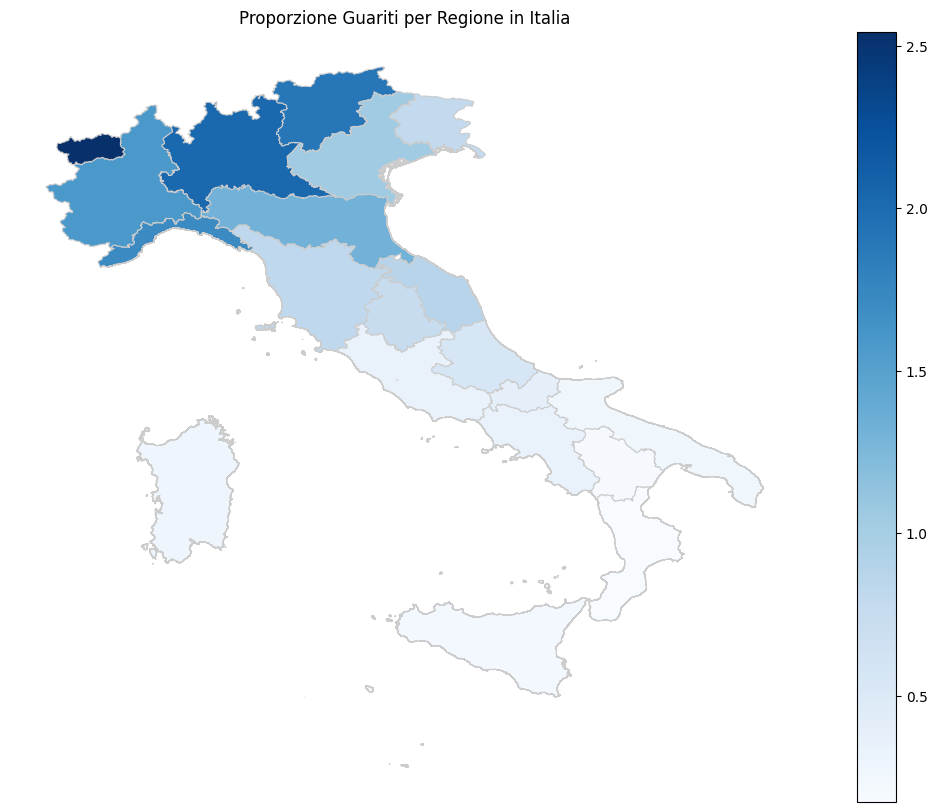

In [51]:
# Creazione del grafico a mappa dell'Italia su base regionale
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#Colorazione in base ai dati
italy_regions.plot(column=0, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Personalizzazione
ax.set_title('Proporzione Guariti per Regione in Italia')
ax.set_axis_off()
leg = ax.get_legend()
plt.show()